In [ ]:
from google.colab import files
uploaded = files.upload()

Saving MSN.csv to MSN.csv


In [ ]:
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns


from datetime import datetime
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.utils import column_or_1d

from keras.models import Sequential
from keras.layers import Dense, GRU

In [ ]:
df = pd.read_csv('MSN.csv')
df

,Date,Price,Open,High,Low,Vol.,Change %
0,3/1/2019,"89,000","89,000","89,200","88,200",683.44K,0.11%
1,3/4/2019,"89,500","89,100","91,400","89,000",1.28M,0.56%
2,3/5/2019,"89,400","89,500","90,900","89,300",772.09K,-0.11%
3,3/6/2019,"90,000","90,000","90,200","89,300",695.52K,0.67%
4,3/7/2019,"90,000","90,700","91,000","89,800",947.51K,0.00%
...,...,...,...,...,...,...,...
1310,5/29/2024,"75,000","75,700","76,900","75,000",8.00M,-0.66%
1311,5/30/2024,"77,200","74,300","77,400","74,100",11.16M,2.93%
1312,5/31/2024,"76,600","78,000","78,400","76,600",5.59M,-0.78%
1313,6/3/2024,"77,700","77,300","78,500","76,800",6.57M,1.44%


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1315 entries, 0 to 1314
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      1315 non-null   object
 1   Price     1315 non-null   object
 2   Open      1315 non-null   object
 3   High      1315 non-null   object
 4   Low       1315 non-null   object
 5   Vol.      1315 non-null   object
 6   Change %  1315 non-null   object
dtypes: object(7)
memory usage: 72.0+ KB


<h1> Tien xu ly du lieu

In [ ]:
df = df.dropna() # Drop missing values
df['Date'] = pd.to_datetime(df['Date'])
df["Price"] = df["Price"].str.replace(',', '').astype(float)

In [ ]:
df1 = df.reset_index()['Price']

In [ ]:
df['Index'] = np.arange(len(df.index))

<h1> Scale du lieu

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

<h1>Split the data into training, testing, and validation sets (7:2:1)

In [ ]:
train_size = int(0.7 * len(df1))
test_size = int(0.2 * len(df1))
val_size = len(df1) - train_size - test_size

In [ ]:
train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

<h1> Create dataset

In [ ]:
#Chuyển mảng giá trị của dataset thành ma trận
def create_dataset(dataset, time_step = 1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   #i=0, X=0,1,2,3...99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
import numpy
#Reshape into X=t,t+1, t+2... t+99 and Y= t+100
time_step =100
X_train, y_train = create_dataset(train_data, time_step)
X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
#Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1] , 1)

In [ ]:
#Define GRU model
model = Sequential()
model.add(GRU(64, input_shape=(time_step, 1)))
model.add(Dense(1))
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
#Fit the model
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
13/13 [==============================] - 3s 95ms/step - loss: 0.2067 - val_loss: 0.0053
Epoch 2/100
13/13 [==============================] - 1s 55ms/step - loss: 0.0305 - val_loss: 0.0318
Epoch 3/100
13/13 [==============================] - 1s 57ms/step - loss: 0.0181 - val_loss: 0.0021
Epoch 4/100
13/13 [==============================] - 1s 57ms/step - loss: 0.0106 - val_loss: 0.0024
Epoch 5/100
13/13 [==============================] - 1s 89ms/step - loss: 0.0053 - val_loss: 0.0024
Epoch 6/100
13/13 [==============================] - 1s 86ms/step - loss: 0.0025 - val_loss: 6.2766e-04
Epoch 7/100
13/13 [==============================] - 1s 91ms/step - loss: 0.0015 - val_loss: 5.8909e-04
Epoch 8/100
13/13 [==============================] - 1s 79ms/step - loss: 0.0013 - val_loss: 6.2868e-04
Epoch 9/100
13/13 [==============================] - 1s 56ms/step - loss: 0.0013 - val_loss: 5.6713e-04
Epoch 10/100
13/13 [==============================] - 1s 56ms/step - loss: 0.0013 - 

<h1> Du bao du lieu test, val

In [ ]:
train_predict = model.predict(X_train)
y_pred = model.predict(X_test)
y_pred_val = model.predict(X_val)

1/1 [==============================] - 0s 31ms/step


In [ ]:
#Chuan hoa du lieu cua y_pred, y_pred_val
train_predict = scaler.inverse_transform(train_predict)
y_pred = scaler.inverse_transform(y_pred)
y_pred_val = scaler.inverse_transform(y_pred_val)

In [ ]:
ytest = scaler.inverse_transform(ytest.reshape(-1,1))
ytest

array([[78800.],
       [79200.],
       [77800.],
       [76800.],
       [78400.],
       [78400.],
       [77000.],
       [77600.],
       [77200.],
       [77900.],
       [79500.],
       [79200.],
       [78100.],
       [78100.],
       [78200.],
       [78700.],
       [78000.],
       [76400.],
       [73300.],
       [71300.],
       [71400.],
       [72300.],
       [73100.],
       [70600.],
       [73000.],
       [74100.],
       [73600.],
       [73600.],
       [73800.],
       [74400.],
       [74100.],
       [73300.],
       [73100.],
       [73200.],
       [72400.],
       [72000.],
       [70400.],
       [71800.],
       [72000.],
       [72000.],
       [71600.],
       [72800.],
       [72000.],
       [71800.],
       [72300.],
       [74100.],
       [73600.],
       [75500.],
       [74400.],
       [76500.],
       [78400.],
       [78800.],
       [78000.],
       [77100.],
       [76600.],
       [74500.],
       [75200.],
       [76100.],
       [76300.

In [ ]:
yval = scaler.inverse_transform(yval.reshape(-1,1))
yval

array([[66100.],
       [66800.],
       [66500.],
       [66900.],
       [64700.],
       [66900.],
       [68100.],
       [67200.],
       [68000.],
       [69800.],
       [71100.],
       [71200.],
       [72300.],
       [71400.],
       [70800.],
       [70800.],
       [70600.],
       [72200.],
       [72400.],
       [75500.],
       [76400.],
       [75800.],
       [73900.],
       [75800.],
       [73500.],
       [73500.],
       [75500.],
       [75000.],
       [77200.],
       [76600.],
       [77700.]])

<h1>
Evaluate the accuracy of the algorithm

In [ ]:
#Tính RMSE, MAE, MAPE
valid_rmse = np.sqrt(np.mean((y_pred_val - yval)**2))
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

#MAE
valid_mae = mean_absolute_error(yval,y_pred_val)
test_mae = mean_absolute_error(ytest, y_pred)
print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)

#MAPE
valid_mape = np.mean(np.abs((yval - y_pred_val) / yval))*100
test_mape = np.mean(np.abs((ytest - y_pred) / ytest))*100
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

Validation RMSE: 1575.9261894675456
Testing RMSE: 1757.0856662673277
Validation MAE: 1301.567540322581
Testing MAE: 1300.425395447531
Validation MAPE: 1.8140850685555865
Testing MAPE: 1.7672394404098002


<h1>Du doan co phieu trong 30 ngay tiep theo

In [ ]:
x_input=val_data[30:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while i < 90:
    if len(temp_input) > 100:
        x_input = np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1, -1, 1)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i += 1
    else:
        x_input = np.array(temp_input)
        x_input = x_input.reshape(1, -1, 1)
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i += 1

0 day input [0.28256215 0.27474117 0.27278593 0.26007684 0.25518873 0.25616635
 0.25518873 0.24247964 0.25030062 0.26496495 0.25714397 0.2581216
 0.27180831 0.27083069 0.26887544 0.25616635 0.26203209 0.25225586
 0.25030062 0.25518873 0.23856915 0.24541251 0.24834537 0.24345726
 0.24247964 0.24345726 0.24345726 0.25616635 0.28256215 0.28158453
 0.27376355 0.27474117 0.26105446 0.26105446 0.26985306 0.27669642
 0.29722649 0.29820411 0.30113697 0.34904046 0.36077193 0.3988992
 0.37641389 0.36663766 0.37836913 0.39987682 0.38032438 0.37641389
 0.37054815 0.36566004 0.36468242 0.37152578 0.37641389 0.34708522
 0.33242089 0.3461076  0.35197333 0.33437613 0.32655515 0.337309
 0.32655515 0.32655515 0.31189082 0.31189082 0.32753277 0.31775655
 0.3109132  0.31189082 0.26300971 0.25518873 0.26203209 0.25909922
 0.26300971 0.24150202 0.26300971 0.27474117 0.26594257 0.27376355
 0.29136075 0.30406984 0.30504746 0.31580131 0.30700271 0.30113697
 0.30113697 0.29918173 0.31482369 0.31677893 0.3470852

In [ ]:
print(scaler.inverse_transform(lst_output))

[[77463.31934208]
 [77510.34777644]
 [77520.7917653 ]
 [77518.78588536]
 [77508.87232676]
 [77493.4959462 ]
 [77474.27851894]
 [77452.37540746]
 [77428.59140247]
 [77403.50266099]
 [77377.50243303]
 [77350.87422442]
 [77323.8222813 ]
 [77296.4898808 ]
 [77268.98676711]
 [77241.37086079]
 [77213.68788856]
 [77186.00186789]
 [77158.32804102]
 [77130.66945639]
 [77103.05355006]
 [77075.47727358]
 [77047.94672385]
 [77020.46494931]
 [76993.04414377]
 [76965.66906497]
 [76938.34276137]
 [76911.07132986]
 [76883.851722  ]
 [76856.65650174]
 [76829.52225047]
 [76802.4184837 ]
 [76775.35129833]
 [76748.32374281]
 [76721.32972023]
 [76694.3631337 ]
 [76667.43008012]
 [76640.53665638]
 [76613.65847489]
 [76586.81382635]
 [76559.99051696]
 [76533.19464362]
 [76506.41401252]
 [76479.66691437]
 [76452.93810692]
 [76426.22454172]
 [76399.52621877]
 [76372.84923497]
 [76346.18749341]
 [76319.55013946]
 [76292.93412465]
 [76266.32725519]
 [76239.74477333]
 [76213.16838837]
 [76186.6224879 ]
 [76160.08

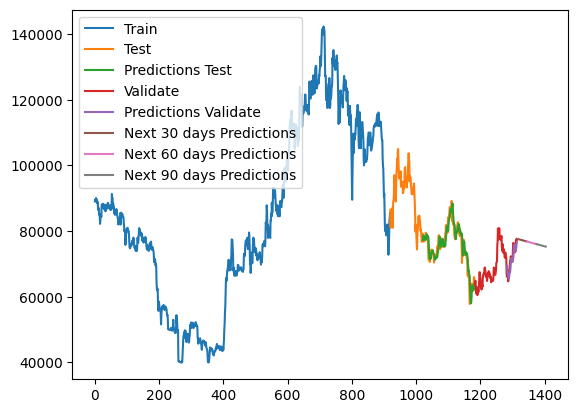

In [ ]:
#Ve hinh
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))

test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))

test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))

val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,scaler.inverse_transform(val_data))

val_data_index = pd.RangeIndex(start=train_size+test_size+101, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,y_pred_val)

next_30_days_index = pd.RangeIndex(start=len(df1), stop=len(df1)+30, step=1)
plt.plot(next_30_days_index, scaler.inverse_transform(lst_output[:30]))

next_60_days_index = pd.RangeIndex(start=len(df1)+30, stop=len(df1)+60, step=1)
plt.plot(next_60_days_index, scaler.inverse_transform(lst_output[30:60]))

next_90_days_index = pd.RangeIndex(start=len(df1)+60, stop=len(df1)+90, step=1)
plt.plot(next_90_days_index, scaler.inverse_transform(lst_output[60:]))

plt.legend(['Train','Test','Predictions Test','Validate','Predictions Validate','Next 30 days Predictions','Next 60 days Predictions','Next 90 days Predictions'])

plt.show()

<h1>Split the data into training, testing, and validation sets (6:3:1)

In [ ]:
train_size = int(0.6 * len(df1))
test_size = int(0.3 * len(df1))
val_size = len(df1) - train_size - test_size

In [ ]:
train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

<h1>Create dataset

In [ ]:
#Chuyển mảng giá trị của dataset thành ma trận
def create_dataset(dataset, time_step = 1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   #i=0, X=0,1,2,3...99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
import numpy
#Reshape into X=t,t+1, t+2... t+99 and Y= t+100
time_step =100
X_train, y_train = create_dataset(train_data, time_step)
X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
#Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1] , 1)

In [ ]:
#Define GRU model
model = Sequential()
model.add(GRU(64, input_shape=(time_step, 1)))
model.add(Dense(1))
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
#Fit the model
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
11/11 [==============================] - 4s 140ms/step - loss: 0.2002 - val_loss: 0.0253
Epoch 2/100
11/11 [==============================] - 1s 105ms/step - loss: 0.0374 - val_loss: 0.0263
Epoch 3/100
11/11 [==============================] - 1s 103ms/step - loss: 0.0247 - val_loss: 0.0030
Epoch 4/100
11/11 [==============================] - 1s 98ms/step - loss: 0.0131 - val_loss: 0.0020
Epoch 5/100
11/11 [==============================] - 1s 67ms/step - loss: 0.0062 - val_loss: 0.0030
Epoch 6/100
11/11 [==============================] - 1s 61ms/step - loss: 0.0024 - val_loss: 0.0013
Epoch 7/100
11/11 [==============================] - 1s 62ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 8/100
11/11 [==============================] - 1s 59ms/step - loss: 0.0013 - val_loss: 0.0014
Epoch 9/100
11/11 [==============================] - 1s 60ms/step - loss: 0.0012 - val_loss: 0.0013
Epoch 10/100
11/11 [==============================] - 1s 60ms/step - loss: 0.0011 - val_loss: 0.0

<h1> Du bao du lieu test, val

In [ ]:
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)
y_pred_val=model.predict(X_val)

1/1 [==============================] - 0s 40ms/step


In [ ]:
#Chuan hoa du lieu cua y_pred, y_pred_val
train_predict = scaler.inverse_transform(train_predict)
y_pred = scaler.inverse_transform(y_pred)
y_pred_val = scaler.inverse_transform(y_pred_val)

In [ ]:
ytest = scaler.inverse_transform(ytest.reshape(-1,1))
ytest

array([[112500.],
       [113300.],
       [112000.],
       [110000.],
       [108600.],
       [107700.],
       [107700.],
       [102100.],
       [100000.],
       [ 99000.],
       [ 94000.],
       [ 90500.],
       [ 91400.],
       [ 86700.],
       [ 81500.],
       [ 80500.],
       [ 79800.],
       [ 81100.],
       [ 78700.],
       [ 79000.],
       [ 79000.],
       [ 82000.],
       [ 80000.],
       [ 80200.],
       [ 74800.],
       [ 72800.],
       [ 75000.],
       [ 78000.],
       [ 83000.],
       [ 83900.],
       [ 85500.],
       [ 86500.],
       [ 81000.],
       [ 85400.],
       [ 84300.],
       [ 84500.],
       [ 86000.],
       [ 87000.],
       [ 81000.],
       [ 86500.],
       [ 89100.],
       [ 89400.],
       [ 90900.],
       [ 97000.],
       [ 95200.],
       [ 95100.],
       [ 91800.],
       [ 92900.],
       [ 89000.],
       [ 94000.],
       [ 97200.],
       [ 99000.],
       [102000.],
       [ 99000.],
       [103900.],
       [10

In [ ]:
yval = scaler.inverse_transform(yval.reshape(-1,1))
yval

array([[66100.],
       [66800.],
       [66500.],
       [66900.],
       [64700.],
       [66900.],
       [68100.],
       [67200.],
       [68000.],
       [69800.],
       [71100.],
       [71200.],
       [72300.],
       [71400.],
       [70800.],
       [70800.],
       [70600.],
       [72200.],
       [72400.],
       [75500.],
       [76400.],
       [75800.],
       [73900.],
       [75800.],
       [73500.],
       [73500.],
       [75500.],
       [75000.],
       [77200.],
       [76600.],
       [77700.]])

<h1>Evaluate the accuracy of the algorithm

In [ ]:
#Tính RMSE, MAE, MAPE
valid_rmse = np.sqrt(np.mean((y_pred_val - yval)**2))
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

#MAE
valid_mae = mean_absolute_error(yval,y_pred_val)
test_mae = mean_absolute_error(ytest, y_pred)
print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)

#MAPE
valid_mape = np.mean(np.abs((yval - y_pred_val) / yval))*100
test_mape = np.mean(np.abs((ytest - y_pred) / ytest))*100
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

Validation RMSE: 1702.3158891292983
Testing RMSE: 2441.328895191355
Validation MAE: 1410.2920866935485
Testing MAE: 1820.9215017064842
Validation MAPE: 1.963566597648731
Testing MAPE: 2.2204040516260313


<h1>Du doan co phieu trong 30, 60, 90 ngay tiep theo





In [ ]:
x_input=val_data[30:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while i < 90:
    if len(temp_input) > 100:
        x_input = np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1, -1, 1)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i += 1
    else:
        x_input = np.array(temp_input)
        x_input = x_input.reshape(1, -1, 1)
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i += 1

0 day input [0.28256215 0.27474117 0.27278593 0.26007684 0.25518873 0.25616635
 0.25518873 0.24247964 0.25030062 0.26496495 0.25714397 0.2581216
 0.27180831 0.27083069 0.26887544 0.25616635 0.26203209 0.25225586
 0.25030062 0.25518873 0.23856915 0.24541251 0.24834537 0.24345726
 0.24247964 0.24345726 0.24345726 0.25616635 0.28256215 0.28158453
 0.27376355 0.27474117 0.26105446 0.26105446 0.26985306 0.27669642
 0.29722649 0.29820411 0.30113697 0.34904046 0.36077193 0.3988992
 0.37641389 0.36663766 0.37836913 0.39987682 0.38032438 0.37641389
 0.37054815 0.36566004 0.36468242 0.37152578 0.37641389 0.34708522
 0.33242089 0.3461076  0.35197333 0.33437613 0.32655515 0.337309
 0.32655515 0.32655515 0.31189082 0.31189082 0.32753277 0.31775655
 0.3109132  0.31189082 0.26300971 0.25518873 0.26203209 0.25909922
 0.26300971 0.24150202 0.26300971 0.27474117 0.26594257 0.27376355
 0.29136075 0.30406984 0.30504746 0.31580131 0.30700271 0.30113697
 0.30113697 0.29918173 0.31482369 0.31677893 0.3470852

In [ ]:
print(scaler.inverse_transform(lst_output))

[[77281.53723475]
 [77285.18622911]
 [77212.5752044 ]
 [77126.8527973 ]
 [77040.13659558]
 [76955.23117301]
 [76872.80414009]
 [76792.80367318]
 [76715.00723544]
 [76639.14046639]
 [76564.95034471]
 [76492.18080062]
 [76420.63978177]
 [76350.15047809]
 [76280.55741864]
 [76211.70208403]
 [76143.50826302]
 [76075.86316296]
 [76008.67837882]
 [75941.89294159]
 [75875.44588229]
 [75809.30061951]
 [75743.40228117]
 [75677.7051405 ]
 [75612.21224597]
 [75546.86872548]
 [75481.67457902]
 [75416.60846746]
 [75351.63685784]
 [75286.76889551]
 [75221.98324132]
 [75157.27989528]
 [75092.64056668]
 [75028.06220707]
 [74963.53262267]
 [74899.05791035]
 [74834.63502169]
 [74770.25176287]
 [74705.91423079]
 [74641.61632857]
 [74577.35500774]
 [74513.13941365]
 [74448.93601337]
 [74384.77529138]
 [74320.64505389]
 [74256.5513978 ]
 [74192.47298396]
 [74128.43115151]
 [74064.40760976]
 [74000.42064941]
 [73936.44588286]
 [73872.5076977 ]
 [73808.59390014]
 [73744.68619949]
 [73680.81812868]
 [73616.96

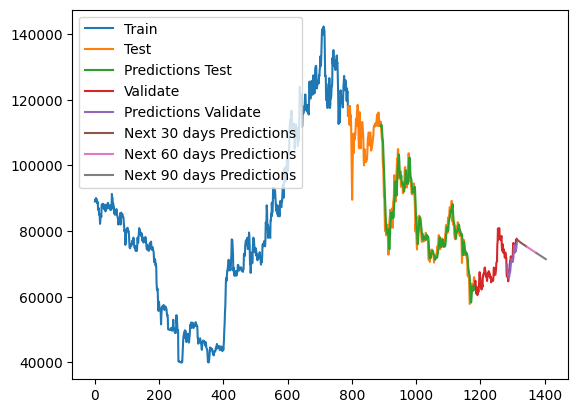

In [ ]:
#Ve hinh
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))

test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))

test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))

val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,scaler.inverse_transform(val_data))

val_data_index = pd.RangeIndex(start=train_size+test_size+101, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,y_pred_val)

next_30_days_index = pd.RangeIndex(start=len(df1), stop=len(df1)+30, step=1)
plt.plot(next_30_days_index, scaler.inverse_transform(lst_output[:30]))

next_60_days_index = pd.RangeIndex(start=len(df1)+30, stop=len(df1)+60, step=1)
plt.plot(next_60_days_index, scaler.inverse_transform(lst_output[30:60]))

next_90_days_index = pd.RangeIndex(start=len(df1)+60, stop=len(df1)+90, step=1)
plt.plot(next_90_days_index, scaler.inverse_transform(lst_output[60:]))

plt.legend(['Train','Test','Predictions Test','Validate','Predictions Validate','Next 30 days Predictions','Next 60 days Predictions','Next 90 days Predictions'])

plt.show()

<h1>Split the data into training, testing, and validation sets (5:3:2)

In [ ]:
train_size = int(0.5 * len(df1))
test_size = int(0.3 * len(df1))
val_size = len(df1) - train_size - test_size

In [ ]:
train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

<h1> Create dataset

In [ ]:
#Chuyển mảng giá trị của dataset thành ma trận
def create_dataset(dataset, time_step = 1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   #i=0, X=0,1,2,3...99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
import numpy
#Reshape into X=t,t+1, t+2... t+99 and Y= t+100
time_step =100
X_train, y_train = create_dataset(train_data, time_step)
X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
#Reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1] , 1)

In [ ]:
#Define GRU model
model = Sequential()
model.add(GRU(64, input_shape=(time_step, 1)))
model.add(Dense(1))
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
#Fit the model
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
9/9 [==============================] - 3s 119ms/step - loss: 0.0557 - val_loss: 0.0358
Epoch 2/100
9/9 [==============================] - 1s 64ms/step - loss: 0.0119 - val_loss: 0.0033
Epoch 3/100
9/9 [==============================] - 1s 60ms/step - loss: 0.0085 - val_loss: 0.0099
Epoch 4/100
9/9 [==============================] - 1s 63ms/step - loss: 0.0049 - val_loss: 0.0097
Epoch 5/100
9/9 [==============================] - 1s 61ms/step - loss: 0.0026 - val_loss: 0.0015
Epoch 6/100
9/9 [==============================] - 1s 64ms/step - loss: 0.0012 - val_loss: 0.0015
Epoch 7/100
9/9 [==============================] - 1s 59ms/step - loss: 7.0617e-04 - val_loss: 0.0015
Epoch 8/100
9/9 [==============================] - 1s 62ms/step - loss: 6.4592e-04 - val_loss: 0.0023
Epoch 9/100
9/9 [==============================] - 1s 67ms/step - loss: 6.5495e-04 - val_loss: 0.0017
Epoch 10/100
9/9 [==============================] - 1s 59ms/step - loss: 6.1436e-04 - val_loss: 0.0016
Ep

<h1>Du bao du lieu test, val

In [ ]:
train_predict = model.predict(X_train)
y_pred = model.predict(X_test)
y_pred_val = model.predict(X_val)

6/6 [==============================] - 0s 11ms/step


In [ ]:
#Chuan hoa du lieu cua y_pred, y_pred_val
train_predict = scaler.inverse_transform(train_predict)
y_pred = scaler.inverse_transform(y_pred)
y_pred_val = scaler.inverse_transform(y_pred_val)

In [ ]:
ytest = scaler.inverse_transform(ytest.reshape(-1,1))
ytest

array([[124087.],
       [117882.],
       [112588.],
       [116724.],
       [116228.],
       [114160.],
       [113084.],
       [119950.],
       [122846.],
       [121605.],
       [121274.],
       [121109.],
       [120447.],
       [119123.],
       [119123.],
       [117634.],
       [121191.],
       [124087.],
       [125410.],
       [127230.],
       [124914.],
       [122846.],
       [124484.],
       [125973.],
       [124782.],
       [124087.],
       [123094.],
       [119620.],
       [123392.],
       [122101.],
       [122399.],
       [115153.],
       [115153.],
       [118131.],
       [115649.],
       [115153.],
       [112274.],
       [118131.],
       [116145.],
       [114061.],
       [115252.],
       [111082.],
       [103339.],
       [ 96192.],
       [ 89541.],
       [ 95795.],
       [102446.],
       [109593.],
       [107012.],
       [103737.],
       [108204.],
       [109693.],
       [107807.],
       [109196.],
       [109196.],
       [11

In [ ]:
yval = scaler.inverse_transform(yval.reshape(-1,1))
yval

array([[72800.],
       [72700.],
       [73500.],
       [73200.],
       [73800.],
       [73100.],
       [72700.],
       [71600.],
       [71000.],
       [68300.],
       [66400.],
       [69000.],
       [66000.],
       [66900.],
       [66000.],
       [61400.],
       [57800.],
       [58000.],
       [58200.],
       [59500.],
       [62700.],
       [63900.],
       [64000.],
       [62000.],
       [63800.],
       [62800.],
       [61700.],
       [62000.],
       [62600.],
       [65800.],
       [66000.],
       [64100.],
       [63600.],
       [64600.],
       [64900.],
       [63300.],
       [61800.],
       [60900.],
       [61300.],
       [62900.],
       [60500.],
       [61500.],
       [62200.],
       [61400.],
       [62100.],
       [63500.],
       [66200.],
       [67500.],
       [66200.],
       [65800.],
       [65000.],
       [63000.],
       [62900.],
       [62200.],
       [63900.],
       [63700.],
       [63000.],
       [66400.],
       [66200.

<h1>Evaluate the accuracy of the algorithm

In [ ]:
#Tính RMSE, MAE, MAPE
valid_rmse = np.sqrt(np.mean((y_pred_val - yval)**2))
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

#MAE
valid_mae = mean_absolute_error(yval,y_pred_val)
test_mae = mean_absolute_error(ytest, y_pred)
print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)

#MAPE
valid_mape = np.mean(np.abs((yval - y_pred_val) / yval))*100
test_mape = np.mean(np.abs((ytest - y_pred) / ytest))*100
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

Validation RMSE: 1660.6118589355824
Testing RMSE: 2900.8767347074377
Validation MAE: 1236.6382045628839
Testing MAE: 2137.980535409556
Validation MAPE: 1.810136764501567
Testing MAPE: 2.1887238906056754


<h1>Du doan co phieu trong 30, 60, 90 ngay tiep theo

In [ ]:
x_input=val_data[30:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while i < 90:
    if len(temp_input) > 100:
        x_input = np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1, -1, 1)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i += 1
    else:
        x_input = np.array(temp_input)
        x_input = x_input.reshape(1, -1, 1)
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i += 1

0 day input [0.36174955 0.3461076  0.34415235 0.3461076  0.34806284 0.35001809
 0.35197333 0.34415235 0.37054815 0.38325724 0.38619011 0.40867542
 0.40867542 0.39792158 0.39596633 0.3988992  0.38619011 0.42040689
 0.43018311 0.42431738 0.43604884 0.43213835 0.45071318 0.46244464
 0.45657891 0.44191458 0.45071318 0.45266842 0.47124324 0.48101946
 0.469288   0.42040689 0.43507122 0.41258591 0.41454115 0.40867542
 0.41160829 0.381302   0.37543626 0.36859291 0.36663766 0.39107822
 0.38814535 0.39792158 0.39107822 0.38716773 0.40574255 0.40574255
 0.41747402 0.41063066 0.40867542 0.38716773 0.40085444 0.39205584
 0.37739151 0.38814535 0.37641389 0.381302   0.38814535 0.37934675
 0.3461076  0.29624886 0.32264466 0.35197333 0.35686144 0.3549062
 0.36566004 0.33242089 0.32753277 0.32068942 0.3197118  0.32753277
 0.32459991 0.33046564 0.32362229 0.3197118  0.30895795 0.30309222
 0.27669642 0.2581216  0.28353977 0.25421111 0.26300971 0.25421111
 0.20924049 0.17404609 0.17600133 0.17795657 0.1906

In [ ]:
print(scaler.inverse_transform(lst_output))

[[77331.43730879]
 [77263.98730952]
 [77167.61057052]
 [77055.03436953]
 [76931.42887732]
 [76800.25408438]
 [76663.8633939 ]
 [76523.83590287]
 [76381.27515009]
 [76236.9310542 ]
 [76091.34014237]
 [75944.88651925]
 [75797.84759378]
 [75650.4276121 ]
 [75502.77899668]
 [75355.02063707]
 [75207.23788986]
 [75059.49782094]
 [74911.85225397]
 [74764.33777034]
 [74617.0000968 ]
 [74469.85447559]
 [74322.91614896]
 [74176.19731072]
 [74029.72234845]
 [73883.49431062]
 [73737.51929411]
 [73591.81863809]
 [73446.37100339]
 [73301.20687452]
 [73156.32015458]
 [73011.72303736]
 [72867.40028062]
 [72723.37627196]
 [72579.64186603]
 [72436.20620817]
 [72293.06320149]
 [72150.22199133]
 [72007.6947715 ]
 [71865.46629974]
 [71723.54876986]
 [71581.93913341]
 [71440.64653572]
 [71299.66792837]
 [71159.01245669]
 [71018.67402378]
 [70878.66482344]
 [70738.97266188]
 [70599.6158298 ]
 [70460.59127873]
 [70321.89900869]
 [70183.54206812]
 [70045.52045703]
 [69907.83722386]
 [69770.49541706]
 [69633.50

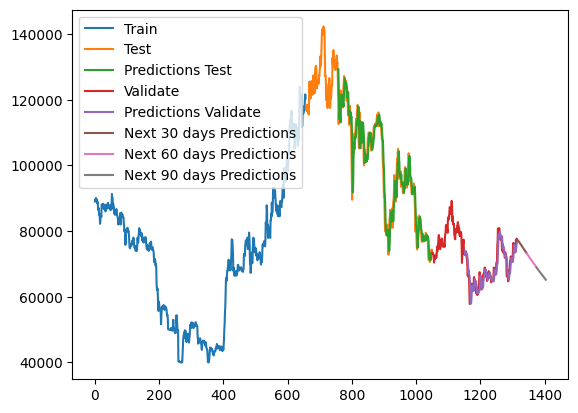

In [ ]:
#Ve hinh
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))

test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))

test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))

val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,scaler.inverse_transform(val_data))

val_data_index = pd.RangeIndex(start=train_size+test_size+101, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,y_pred_val)

next_30_days_index = pd.RangeIndex(start=len(df1), stop=len(df1)+30, step=1)
plt.plot(next_30_days_index, scaler.inverse_transform(lst_output[:30]))

next_60_days_index = pd.RangeIndex(start=len(df1)+30, stop=len(df1)+60, step=1)
plt.plot(next_60_days_index, scaler.inverse_transform(lst_output[30:60]))

next_90_days_index = pd.RangeIndex(start=len(df1)+60, stop=len(df1)+90, step=1)
plt.plot(next_90_days_index, scaler.inverse_transform(lst_output[60:]))

plt.legend(['Train','Test','Predictions Test','Validate','Predictions Validate','Next 30 days Predictions','Next 60 days Predictions','Next 90 days Predictions'])

plt.show()